![logo](https://climate.copernicus.eu/sites/default/files/2025-03/logoline_c3s.png)


# Monthly mean tropospheric humidity data from satellite-based radio occultation measurements

**This notebook can be run on free online platforms, such as Binder, Kaggle and Colab, or they can be accessed from GitHub. The links to run this notebook in these environments are provided here, but please note they are not supported by ECMWF.** 

[![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/main?labpath=tropospheric-humidity-from-radio-occultation.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/tropospheric-humidity-from-radio-occultation.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/tropospheric-humidity-from-radio-occultation.ipynb)
[![github](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-atmos-physics/blob/main/tropospheric-humidity-from-radio-occultation.ipynb)

## Learning objectives 🎯

In this tutorial we will work with monthly mean tropospheric humidity data from the Climate Data Store (CDS), demonstrating how the data can be accessed, and inspecting the data to get a quick view on the physical variables available and the data structures used. We will also have a closer look at some **_use cases_** that demonstrate a few useful applications and processing steps. The use cases include some plotting that will teach you about the humidity data and how it can be visualized.

Atmospheric humidity plays an important role in the Earth's climate system, both for its strong greenhouse effect but also for its role in the global energy transport. It is central to the hydrological cycle and sets the fundamental conditions for the biosphere, including distribution of rainfall and droughts.

## Prepare your environment

### Set up CDSAPI and your credentials

We are using `cdsapi` to download the data and `nc-time-axis` for improved handling of time coordinates in Xarray datasets.

These packages are not yet included by default on most cloud platforms. You can use `pip` to install it, we use an exclamation mark to pass the command to the shell (not to the Python interpreter).

If you have not setup your ~/.cdsapirc file with your credenials, you can replace None with your credentials that can be found on the how to api page (you will need to log in to see your credentials).

In [ ]:
!pip install -q cdsapi
!pip install -q nc-time-axis

# If you have already setup your .cdsapirc file you can leave this as None
cdsapi_key = None
cdsapi_url = None

### (Install and) Import libraries

We will work with data stored in multidimensional arrays, with associated meta-data propagated from the data files. For this purpose, we use a few standard Python libraries, in particular `Xarray` but also `Numpy`. We will also need libraries for file handling and plotting. For the latter, we will use `Matplotlib` as well as the `Xarray` built-in plotting tools.

In [2]:
# CDS API
import cdsapi

# OS functions
import os

# File download and zip archive handling
from urllib.request import urlretrieve
import zipfile

# Libraries for working with multidimensional arrays and time series data
import numpy as np
import xarray as xr
import cftime

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt

### Specify data directory

In [ ]:
# Directory to store data
# Please ensure that datadir is a location where you have write permissions
DATADIR = './data_dir/'
# Create this directory if it doesn't exist
os.makedirs(DATADIR, exist_ok=True)

## Explore data

The gridded monthly-mean tropospheric humidity dataset, derived from a large number of observed humidity profiles retrieved from satellite-based Radio Occultation (RO) measurements, originate from EUMETSAT's ROM SAF facility. It comprises time series of continuous humidity observations from space, starting in late 2006 and regularly extended up to present. As the dataset encompasses the entire globe, from the surface up to an altitude of 12 kilometers, and have high vertical resolution revealing fine scale details of the variations with height, it is well suited for analysis of the latitudinal and height distributions of humidity.

### Search for data

The data to use in this tutorial is the [Tropospheric humidity profiles averaged monthly and zonally from 2006 to present derived from satellite observations](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-humidity-profiles?tab=overview). Look up this dataset in the CDS and select the ["Download data"](https://cds.climate.copernicus.eu/datasets/satellite-humidity-profiles?tab=download) tab. There, you will find a form where you can specify whether to use observed RO data or the corresponding reanalysis data, as well as the time period to study. Select the following parameters:

:::{dropdown} Parameters of data to download

- Product type: `Radio occultation data`
- Year: `All`
- Month: `All`
- Variable: `All available variables`
- Format: `Zip file`

:::

At the end of the download form, select "Show API request". This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below). Having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory.

::: {warning}

Please remember to accept the terms and conditions of the dataset, at the bottom of the CDS download form!

:::


### Download the data

With the API request copied into the cells below, running these cells will retrieve and download the data you requested into your local directory.


In [ ]:
c = cdsapi.Client()

# Name of the zip file where data from the CDS land.
zipfilepath = os.path.join(DATADIR, 'ro_hum_monthly_lhgrid.zip')

# Download
c.retrieve(
    'satellite-humidity-profiles',
    {
        'product_type': 'radio_occultation_data',
        'year': [
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019', '2020', '2021',
            '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'variable': 'all',
        'format': 'zip',
    },
    zipfilepath
)

2024-12-17 14:42:33,146 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-17 14:42:33,147 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-17 14:42:33,148 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-17 14:42:33,148 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

3f1b80d6a683fc2b92642ec8981daff0.zip:   0%|          | 0.00/43.1M [00:00<?, ?B/s]

'./data/ro_hum_monthly_lhgrid.zip'

### Unpack and merge data files

A zip file should now be available in your local directory. That file will now be unzipped into monthly netCDF files, which will then be merged into a single netCDF file containing all months. After that, the monthly files are deleted.

In [6]:
# Unzip the data into monthly files (about 200 for the full RO dataset).
with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
    filelist = [os.path.join(DATADIR, f) for f in zip_ref.namelist()]
    zip_ref.extractall(DATADIR)

# Make sure the filelist is in the correct order.
filelist.sort(key=lambda x: x.split('_')[3])

# Merge monthly netCDF files into a single combined file.
merged_netcdf_file = os.path.join(DATADIR, 'hum_mon_lagrid_metop.nc')
ds = xr.open_mfdataset(filelist, concat_dim='time', combine='nested')
ds.to_netcdf(merged_netcdf_file)

# Delete the monthly netCDF files.
for f in filelist:
    os.remove(f)

### Store as Xarray object and inspect data

Now the data should be ready for inspection. The netCDF file format used here is commonly used for array-oriented scientific data. To read and process this data, we will make use of the [Xarray](http://xarray.pydata.org/en/stable/) library. Xarray is a Python library designed for working with multi-dimensional arrays that include meta-data. We will read the data from the netCDF file into an [Xarray dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html).

After loading, we print the `xarray.Dataset` to explore the contents.

In [7]:
# Load data from the merged netCDF file into an Xarray dataset.
ds = xr.open_dataset(merged_netcdf_file)
ds

<xarray.Dataset> Size: 52MB
Dimensions:    (time: 204, nv: 2, lat: 36, lon: 1, alt: 251)
Coordinates:
  * time       (time) object 2kB 2007-01-16 00:00:00 ... 2023-12-16 00:00:00
  * alt        (alt) float32 1kB 0.0 200.0 400.0 ... 4.96e+04 4.98e+04 5e+04
  * lat        (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * lon        (lon) float32 4B 180.0
Dimensions without coordinates: nv
Data variables:
    mission    (time) |S64 13kB ...
    year       (time) int32 816B ...
    month      (time) int32 816B ...
    time_bnd   (time, nv) object 3kB ...
    lat_bnd    (time, lat, nv) float32 59kB ...
    lon_bnd    (time, lon, nv) float32 2kB ...
    WQ         (time, alt, lat, lon) float32 7MB ...
    Q          (time, alt, lat, lon) float32 7MB ...
    Q_num      (time, alt, lat, lon) float64 15MB ...
    Q_obssig   (time, alt, lat, lon) float32 7MB ...
    Q_samperr  (time, alt, lat, lon) float32 7MB ...
    Q_stdev    (time, alt, lat, lon) float32 7MB ...
Attributes: (12/15)
    title:                ROM SAF Radio Occultation Data
    description:          Reprocessed gridded monthly mean humidity
    institution:          DMI (ROM SAF)
    history:              Based on EUMETSAT excess phase data
    Conventions:          CF-1.6
    product_doi:          10.15770/EUM_SAF_GRM_0002
    ...                   ...
    product_version:      1.0
    processing_center:    DMI (ROM SAF)
    processing_software:  GPAC 2.3.0
    processing_date:      2018-01-12 14:42:37.763
    software_name:        ROMCLIM
    software_version:     V1.2

The dataset has one _data variable_ called **_Q_**, which is the monthly mean specific humidity, and four _coordinates_ **_time_**, **_alt_**, **_lat_**, and **_lon_**. The _dimensions_ show that the longitude is collapsed into a single grid point, while there are 36 latitudes and 251 altitudes. Hence, the grid is a purely zonal latitude-altitude grid, with data averaged over all longitudes.

We now remove the longitude dimension since that is not really used. We also convert altitudes to kilometers.

In [8]:
# Remove the longitude dimension, which has size one
ds = ds.drop_vars(['lon', 'lon_bnd'])
ds = ds.squeeze()

# Convert altitudes to kilometer
ds.coords['alt'] = ds['alt'] / 1000.0

While an Xarray `Dataset` may contain multiple variables, an Xarray `DataArray` holds a single multi-dimensional variable and its coordinates. Let us now extract data arrays from the datasets, in order to simplify the data processing.

In [69]:
# Extract Xarray data arrays from Xarray datasets
da_year  = ds['year']
da_month = ds['month']
da_mean  = ds['Q']
da_stdev = ds['Q_stdev']
da_num   = ds['Q_num']

da_time = ds['time']
da_lat  = ds['lat']
da_alt  = ds['alt']

# # Extract dimensions as integers
Ntime = ds.sizes['time']
Nalt  = ds.sizes['alt']
Nlat  = ds.sizes['lat']

Let's now inspect the data array containing the humidity monthly means:

In [10]:
da_mean

<xarray.DataArray 'Q' (time: 204, alt: 251, lat: 36)> Size: 7MB
[1843344 values with dtype=float32]
Coordinates:
  * time     (time) object 2kB 2007-01-16 00:00:00 ... 2023-12-16 00:00:00
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * alt      (alt) float32 1kB 0.0 0.2 0.4 0.6 0.8 ... 49.2 49.4 49.6 49.8 50.0
Attributes:
    cell_methods:  time: area: mean
    long_name:     monthly mean humidity (sampling error corrected)
    units:         g/kg
    valid_range:   [ 0. 50.]

As expected, we find that this Xarray object only contains the humidity monthly means, along with the relevant coordinate variables and attributes.

## Use case 1: global latitude-height distribution of tropospheric humidity

### Monthly mean humidity

This use case is about visualizing humidity data from a selected month. With the built-in Xarray method `plot()`, you can easily plot a certain time step of the loaded array. Let's generate some plots for January 2007.

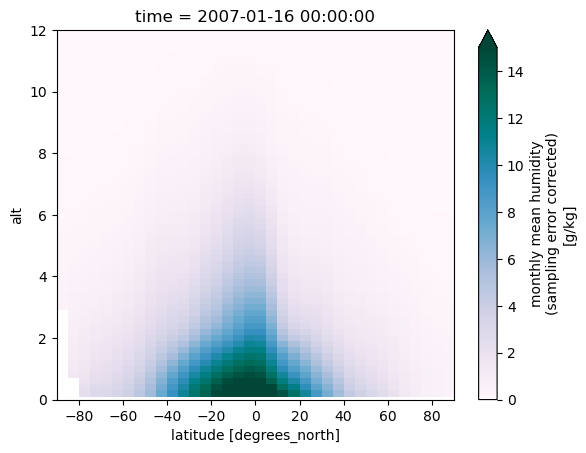

In [30]:
# January 2007
plot_date = "2007-01"

da_mean_plot_date = da_mean.sel(time=plot_date).squeeze()
da_stdev_plot_date = da_stdev.sel(time=plot_date).squeeze()

da_mean_plot_date.plot(
    xlim=[-90.0, 90.0], ylim=[0.0, 12.0], vmin=0.0, vmax=15.0, extend='max', cmap='PuBuGn'
)

An alternative to the built-in Xarray plotting functions is to use [Matplotlib](https://matplotlib.org/) plotting tools that operate on Numpy arrays. Here, we repeat the monthly mean humidity plot using Matplotlib. The _contourf_ function gives a less "noisy" plot than _pcolormesh_, and have access to more plot options, but may require some experimentation. It is also possible to save the plot as a png file.

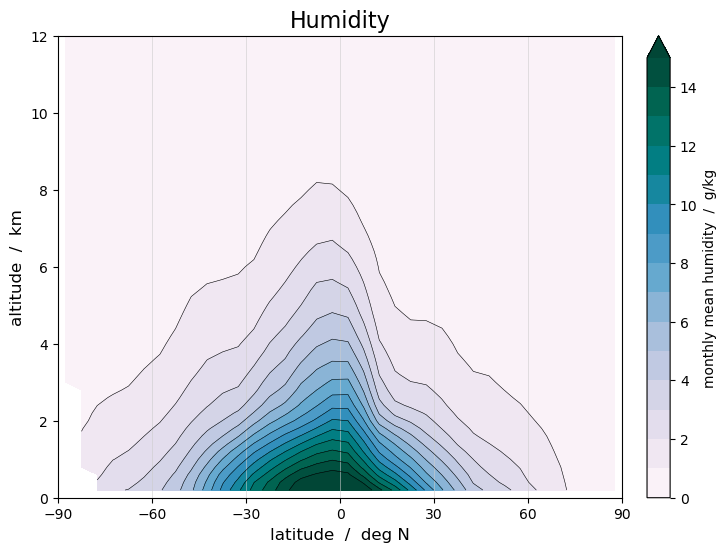

In [ ]:
# Create the figure panel
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the data with pcolormesh
# im = plt.pcolormesh(X, Y, Z[imon,:,:,0], vmin=0.0, vmax=15.0, cmap='PuBuGn')   # 'RdBu_r'

# ... or plot with contour/contourf, manually defining the set of contours
clevels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
im = plt.contour(
    da_lat, da_alt, da_mean_plot_date, levels=clevels, linewidths=0.4, colors='k'
)
im = plt.contourf(
    da_lat, da_alt, da_mean_plot_date, levels=clevels, vmin=0.0, vmax=15.0,
    extend='max', cmap='PuBuGn'
)

# Set figure title, axes ticks and labels, grid, etc.
ax.set_title('Humidity', fontsize=16)
ax.set_xlabel('latitude  /  deg N', fontsize=12)
ax.set_ylabel('altitude  /  km', fontsize=12)
ax.set_xlim(xmin=-90.0, xmax=90.0)
ax.set_ylim(ymin=0.0, ymax=12.0)
ax.xaxis.set_ticks([-90, -60, -30, 0, 30, 60, 90])
ax.xaxis.grid(True, linewidth=0.4, linestyle='-', color='0.8')

# Specify the colorbar
cbar = fig.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('monthly mean humidity  /  g/kg')

# Save the figure as a png file
# fig.savefig(f'{DATADIR}hum_mon_lagrid_metop.png')

We find that the humidity has a peak in the lower troposphere near the equator. As we will se below (Use case 3) this peak moves seasonally back and forth in the north-south direction, as the Inter-Tropical Convergence Zone (ITCZ) moves through the seasons. We will also see (Use case 4) that the ENSO phenomenon in the Pacific has a dominating impact on the global humidity.

### Monthly standard deviation

Similarly, we can plot the monthly standard deviation as measure of the variability of the humidity within a month:

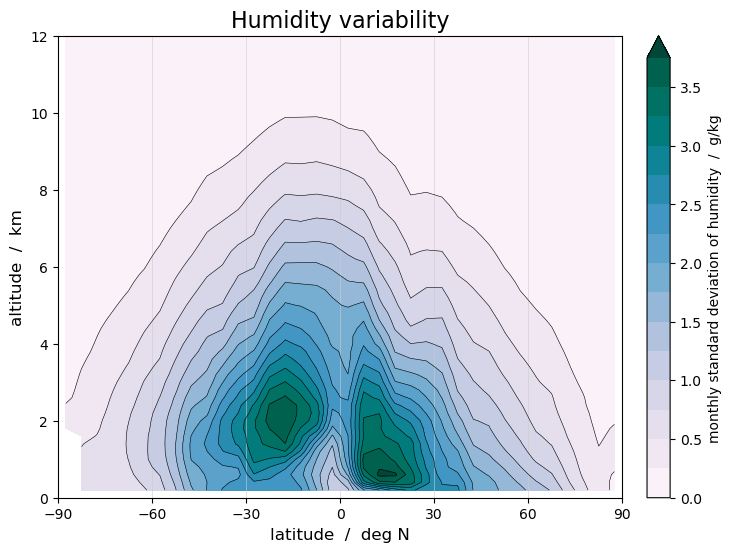

In [ ]:
# Create the figure panel
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the data with pcolormesh
# im = plt.pcolormesh(X, Y, Z[imon,:,:,0], vmin=0.0, vmax=4.0, cmap='PuBuGn')   # 'RdBu_r'

# ... or plot with contour/contourf
im = plt.contour(
    da_lat, da_alt, da_stdev_plot_date, levels=15, linewidths=0.4, colors='k'
)
im = plt.contourf(
    da_lat, da_alt, da_stdev_plot_date, levels=15, vmin=0.0, vmax=4.0,
    extend='max', cmap='PuBuGn'
)
# Set figure title, axes ticks and labels, grid, etc.
ax.set_title('Humidity variability', fontsize=16)
ax.set_xlabel('latitude  /  deg N', fontsize=12)
ax.set_ylabel('altitude  /  km', fontsize=12)
ax.set_xlim(xmin=-90.0, xmax=90.0)
ax.set_ylim(ymin=0.0, ymax=12.0)
ax.xaxis.set_ticks([-90, -60, -30, 0, 30, 60, 90])
ax.xaxis.grid(True, linewidth=0.4, linestyle='-', color='0.8')

# Specify the colorbar
cbar = plt.colorbar(im, fraction=0.05, pad=0.04)
cbar.set_label('monthly standard deviation of humidity  /  g/kg')

# Save the figure
# fig.savefig(f'{DATADIR}hum_mon_lagrid_metop.png')

The zonal standard deviation plot has a pronounced two-peaked structure. This is largely a consequence of the fact that the standard deviation in a zonal grid not only measures the variability in time, but also the variability in longitude. Near the edge of the ITCZ, between say 15-25 degrees latitude, we find regions that are dry as well as regions that are humid at the same latitude, while nearer the equator humid conditions prevail at almost all longitudes. Just like the humidity distribution, the variability distribution moves seasonally back and forth over the equator as the ITCZ moves.


## Use case 2: climate normal and anomalies

### WMO standard reference periods

The World Meteorological Organization (WMO) defines standard reference periods for which climate normals are computed. Since 2021, the WMO recommends basing climate normals on the 1991-2020 reference period, replacing the previously used time period 1981-2010. 

Climate normals can be considered as the typical climate for the period the normals are based on. It is important that the reference periods are long enough that year-to-year variations are reasonably averaged out in the computed normals.

### Climate normals for a reference period

Many observational data records are not available for the full 30-year reference period recommended by the WMO. We have to work with shorter reference periods, limited by the availability of data.

To compute a climate normal we first define a certain reference period, and limit the data arrays to that period:

In [34]:
# Select a reference time period. Whole years.
year_ref_from = 2007
year_ref_to   = 2022

Ntime_ref = 12*(year_ref_to - year_ref_from + 1)

# Select data from the reference period (for computing the normals)
da_mean_ref = da_mean.sel(time=slice(f'{year_ref_from}-01', f'{year_ref_to}-12')).squeeze()
da_mean_ref

<xarray.DataArray 'Q' (time: 192, alt: 251, lat: 36)> Size: 7MB
[1734912 values with dtype=float32]
Coordinates:
  * time     (time) object 2kB 2007-01-16 00:00:00 ... 2022-12-16 00:00:00
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * alt      (alt) float32 1kB 0.0 0.2 0.4 0.6 0.8 ... 49.2 49.4 49.6 49.8 50.0
Attributes:
    cell_methods:  time: area: mean
    long_name:     monthly mean humidity (sampling error corrected)
    units:         g/kg
    valid_range:   [ 0. 50.]

We then compute two types of normal: a) the long-term climatological mean and b) the mean annual cycle (i.e., the climatologies for the particular months). For the latter, we use the Xarray method `groupby()` to group the data by month.

In [35]:
# Normals: long-term mean and mean seasonal cycle over the reference period
da_longnorm = da_mean_ref.mean(dim='time', skipna=True, keep_attrs=True)
da_seasnorm = da_mean_ref.groupby('time.month').mean(skipna=True, keep_attrs=True)

Plot the long-term climatological mean (using the built-in Xarray plot tool).

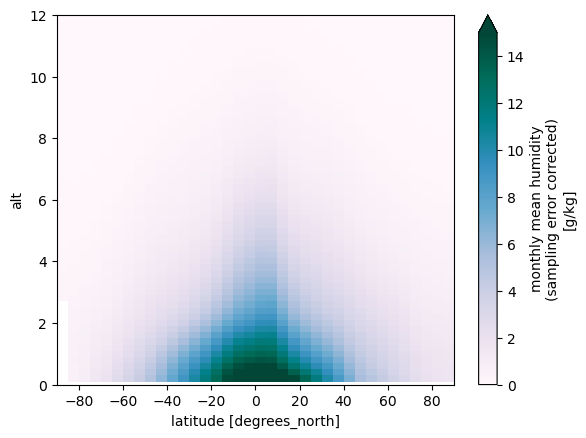

In [37]:
da_longnorm.plot(xlim=[-90.0, 90.0], ylim=[0.0, 12.0], vmin=0.0, vmax=15.0,
                 extend='max', cmap='PuBuGn')

Plot the 12 monthly climatological means, representing the mean annual cycle.

Text(0.5, 1.02, 'Humidity mean annual cycle')

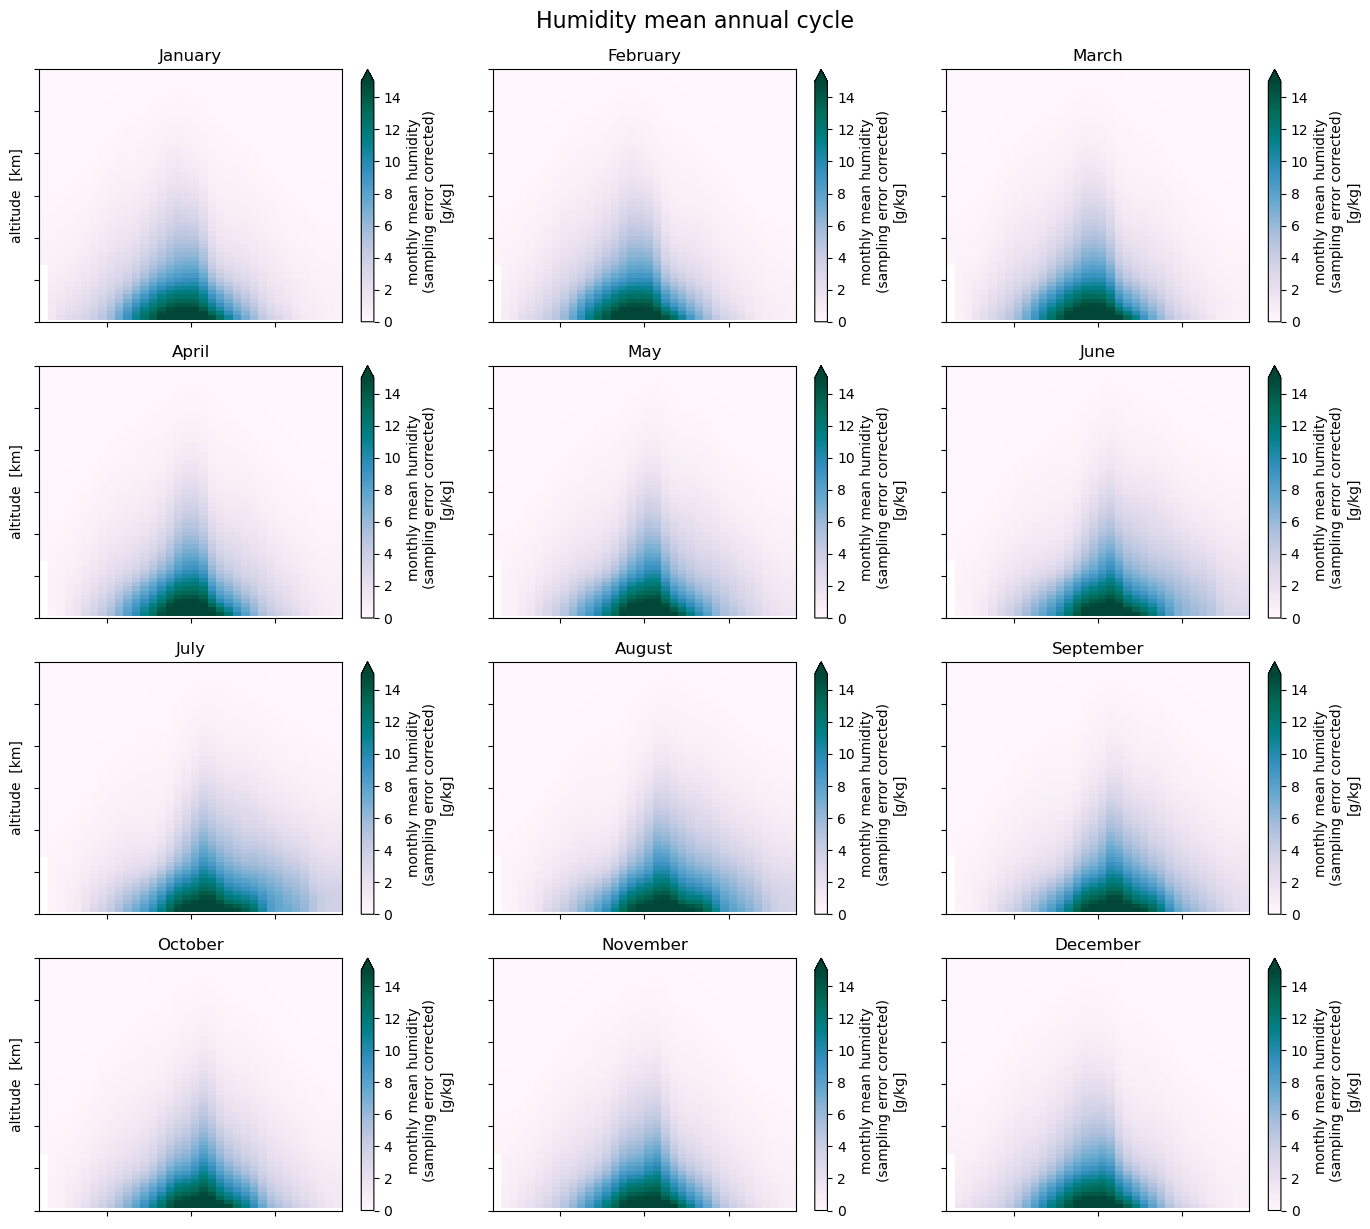

In [39]:
monstrng = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))

for irow in range(4):
    da_seasnorm.sel(month=3*irow+1).plot(
        ax=axes[irow, 0], ylim=[0.0, 12.0], cmap="PuBuGn", add_colorbar=True, vmin=0.0, vmax=15.0,
        extend="max")

    da_seasnorm.sel(month=3*irow+2).plot(
        ax=axes[irow, 1], ylim=[0.0, 12.0], cmap="PuBuGn", add_colorbar=True, vmin=0.0, vmax=15.0,
        extend="max")

    da_seasnorm.sel(month=3*irow+3).plot(
        ax=axes[irow, 2], ylim=[0.0, 12.0], cmap="PuBuGn", add_colorbar=True, vmin=0.0, vmax=15.0,
        extend="max")

    axes[irow, 0].set_title(monstrng[3*irow+0])
    axes[irow, 1].set_title(monstrng[3*irow+1])
    axes[irow, 2].set_title(monstrng[3*irow+2])

    axes[irow, 0].set_ylabel("altitude  [km]")
    axes[irow, 1].set_ylabel("")
    axes[irow, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.set_xlabel("")

plt.tight_layout()

fig.suptitle("Humidity mean annual cycle", fontsize=16, y=1.02)

### Anomalies with respect to a normal

With the normals thus defined, we can compute the anomalies with respect to the long-term climatological means as well as the anomalies with respect to the mean annual cycle. It is commonly the latter that is loosely referred to as "anomalies". Alternatively, we can express the anomalies in fractional terms, as the difference in percent relative to the normal.

In [41]:
# Anomalies: relative to long-term mean and relative to mean seasonal cycle
da_amean    = da_mean - da_longnorm
da_desamean = da_mean.groupby('time.month') - da_seasnorm

# Percentage anomalies
da_famean    = 100.0 * (da_amean / da_longnorm)
da_desfamean = 100.0 * (da_desamean.groupby('time.month') / da_seasnorm)

The last data array ('da_desfamean') contains the fractional anomalies with respect to the mean seasonal cycle, or 'deseasonalized' anomalies. Let us now plot these anomalies for a full year:

Text(0.48, 1.02, 'Humidity anomalies during 2007')

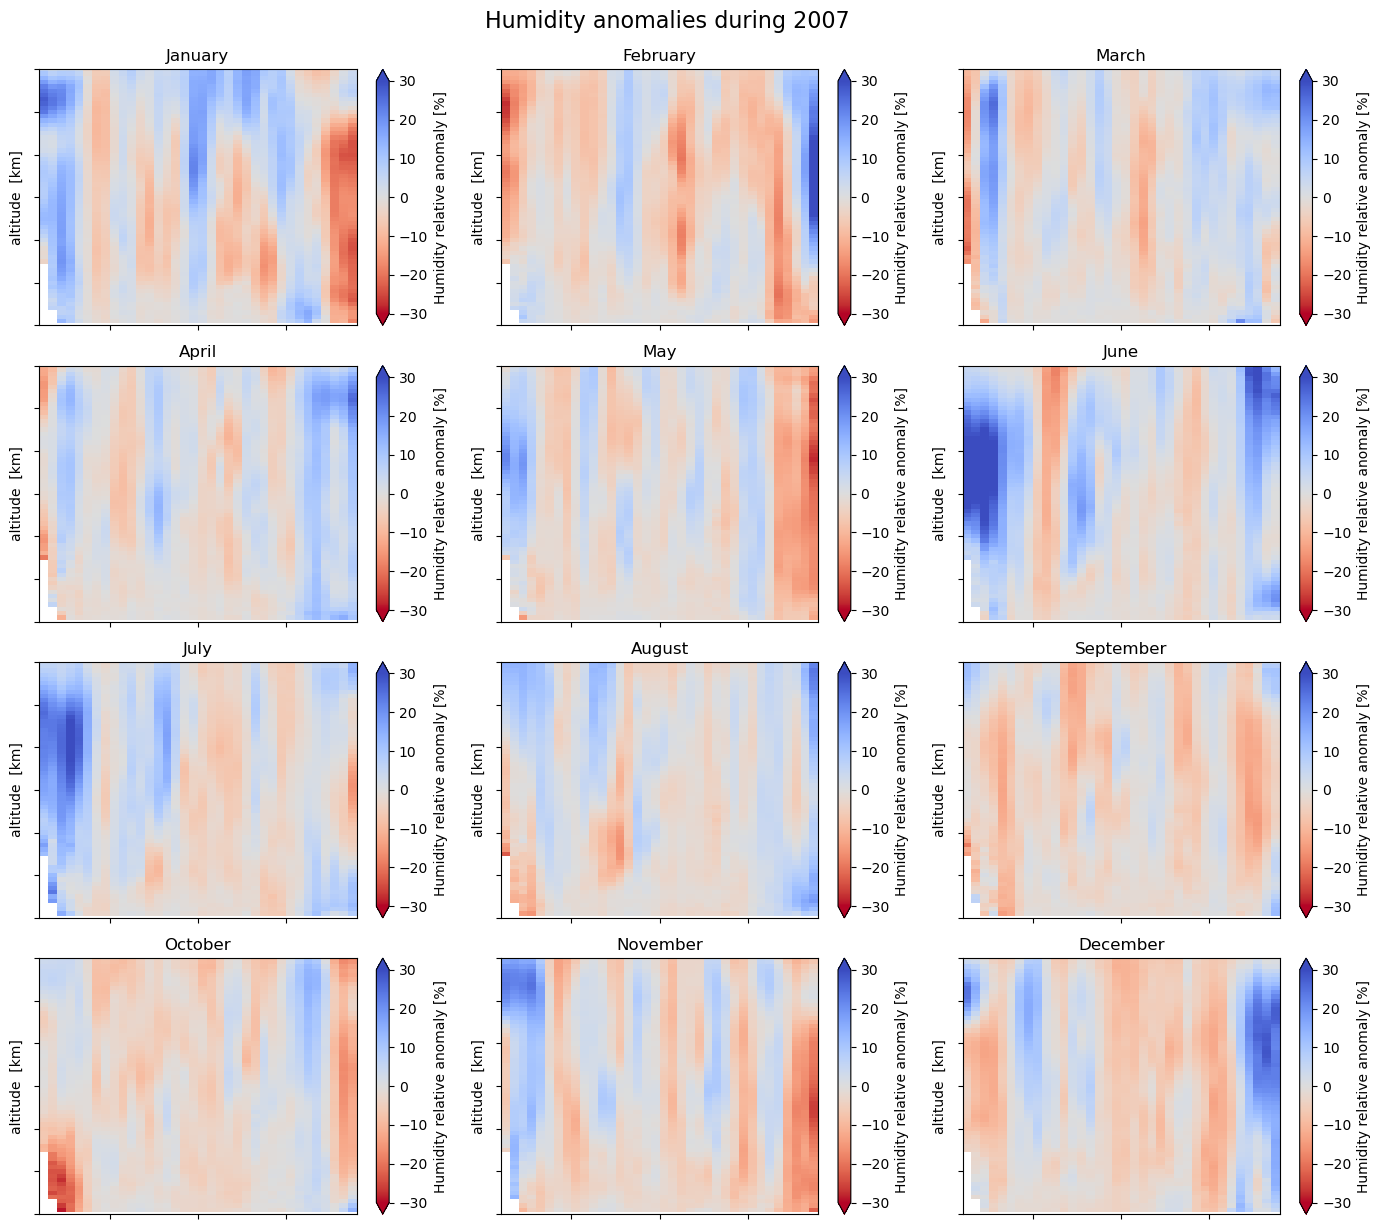

In [47]:
pltyear = 2007

itime0 = 12*(pltyear - year_ref_from)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))

for irow in range(4):
    for icol in range(3):
        # da_desfamean[itime0+3*irow+icol, :, :].plot(
        da_desfamean.sel(time=f"{pltyear}-{3*irow+icol+1:02d}").plot(
            ax=axes[irow, icol], ylim=[0.0, 12.0],
            vmin=-30.0, vmax=30.0, cmap="coolwarm_r",
            add_colorbar=True, extend="both", cbar_kwargs={'label': "Humidity relative anomaly [%]"})
        axes[irow, icol].set_title(monstrng[3*irow+icol])
        axes[irow, icol].set_ylabel("altitude  [km]")

for icol in range(3):
    axes[3, icol].set_xlabel("latitude  [deg N]")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.set_xlabel("")

plt.tight_layout()

fig.suptitle("Humidity anomalies during "+str(pltyear), fontsize=16, x=0.48, y=1.02)

It is emphasized that the percentages in the anomaly plots are the deviations of the specific humidity from the selected normal. It has nothing to do with relative humidity.

We find that the anomalies are mostly within about 10-15% of the normal seasonal cycle, occasionally and regionally extending to 20-30% or more. Some years (e.g., 2008) are globally drier and some years (e.g., 2016) are more humid. An important factor for the global humidity is the equatorial Pacific with the El Niño Southern Oscillation (ENSO) cycles, which is further explored in Use case 4 below. 

You can change normal, from mean seasonal cycle to long-term climatology by using the variable 'da_famean' instead of 'da_desfamean'. You may also need to change the span of the colorbar from 30% to 100% to accommodate the larger deviations from the normal. Doing this for any year reveal the strong seasonal cycle of the specific humidity, where the change of sign of the anomaly in a hemisphere occurs in May and November. The seasonal variations of the humidity is further explored in Use case 3 below.


## Use case 3: seasonal variations of tropospheric humidity

We will now take a closer look at the seasonal humidity variations; first height-resolved and then vertically averaged over atmospheric layers.

### Averaging humidity in latitude zones
The data are already averaged over longitude and within 5-degree latitude bands. The averaging has been done at fixed altitudes. Let us now average in six larger latitude zones, including globally, but still keep the data height resolved.

In [61]:
# Dictionary defining the latitude zones
latzones = {
    '90°S-60°S': [0,  0,  6],  # [-90,-60],
    '60°S-30°S': [1,  6, 12],  # [-60,-30],
    '30°S-30°N': [2, 12, 24],  # [-30, 30],
    '30°N-60°N': [3, 24, 30],  # [ 30, 60],
    '60°N-90°N': [4, 30, 36],  # [ 60, 90],
    '90°S-90°N': [5,  0, 36]}  # [-90, 90]}

# Define a new data array to hold the latitude zone averages (Ntime x Nalt x Nlatzone)
da_mean_latzone = da_mean[:, :, 0:6].copy().rename({'lat': 'latzone'})

# Define a new data array to hold the cos-lat-weighted humidity data (Ntime x Nalt x Nlat)
da_mean_weighted = da_mean.copy()

# Compute averages in five latitude zones and globally
latweight = np.cos(np.deg2rad(da_lat)).rename('latweight')
latweight = latweight.expand_dims(dim={"time": len(da_mean['time']), "alt": len(da_mean['alt'])})   # broadcast the latweight array
latweight_masked = latweight.where(da_mean.notnull())   # weights are NaN where da_mean is NaN
for izon in latzones:
    i = latzones[izon][0]   # latzone
    k = latzones[izon][1]   # from lat
    n = latzones[izon][2]   # to lat
    da_mean_weighted[:, :, k:n] = da_mean[:, :, k:n] * latweight_masked[:, :, k:n] / \
                                  latweight_masked[:, :, k:n].sum(dim='lat', skipna=True)
    da_mean_latzone[:, :, i] = da_mean_weighted[:, :, k:n].mean(dim='lat', skipna=True)

The Xarray object 'da_mean_latzone' contains monthly mean humidity in six wide latitude zones instead of the 5-degree latitude bands. Following the example in Use case 2 above, we now compute the anomalies of that data.

In [52]:
# Select a reference time period. Whole years.
year_ref_from = 2007
year_ref_to   = 2022

Ntime_ref = 12*(year_ref_to - year_ref_from + 1)

# Select data from the reference period (for computing the normals)
da_mean_latzone_ref = da_mean_latzone.where((da_year >= year_ref_from) &
                                            (da_year <= year_ref_to), drop=True)

# Normals: long-term mean and mean seasonal cycle over the reference period
da_longnorm = da_mean_latzone_ref.mean(dim='time', skipna=True, keep_attrs=True)
da_seasnorm = da_mean_latzone_ref.groupby('time.month').mean(skipna=True, keep_attrs=True)

# Anomalies relative to a) long-term mean and b) mean seasonal cycle
da_amean_latzone    = da_mean_latzone - da_longnorm
da_desamean_latzone = da_mean_latzone.groupby('time.month') - da_seasnorm

# Fractional anomalies
da_famean_latzone    = 100.0 * (da_amean_latzone / da_longnorm)
da_desfamean_latzone = 100.0 * (da_desamean_latzone.groupby('time.month') / da_seasnorm)

### Seasonal cycles in height-resolved data

We can now plot the height-resolved anomalies as time series. Let us do this for the fractional anomalies (anomalies expressed in percent) in three latitude zones: northern mid-latitudes, low latitudes, and southern mid-latitudes.

Text(0.5, 0, '')

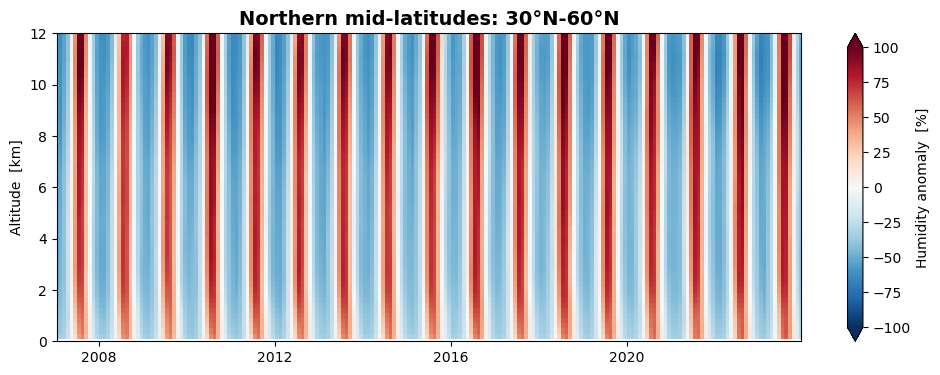

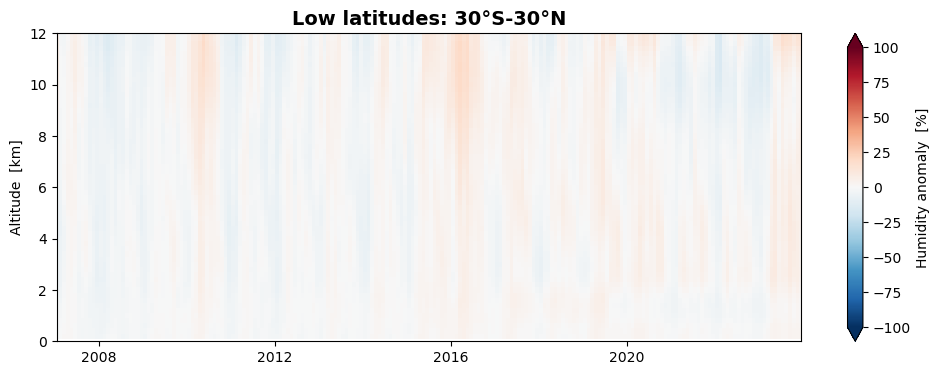

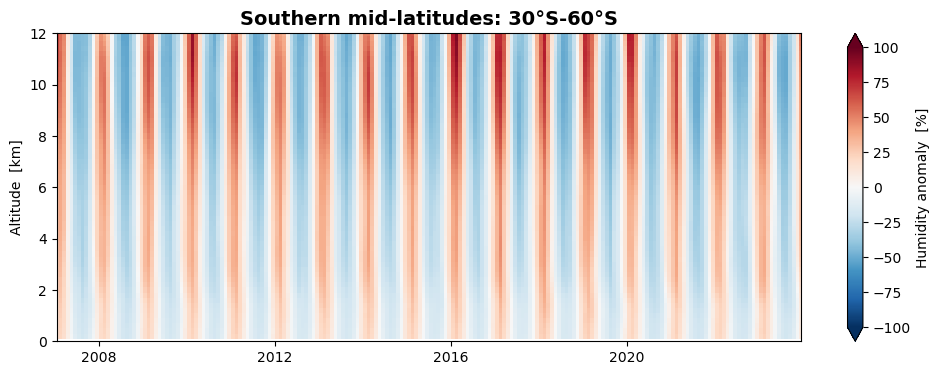

In [56]:
# Start/end times as instances of cftime
date_from = da_mean['time'][0].values
date_to   = da_mean['time'][-1].values

# Northern mid-latitudes (30°N-60°N)
izon = 3
da_famean_latzone[:, :, izon].plot(figsize=(12, 4), x='time', y='alt',
                                   xlim=[date_from, date_to], ylim=[0.0, 12.0],
                                   vmin=-100.0, vmax=100.0, extend='both', cmap='RdBu_r',
                                   cbar_kwargs={'label': "Humidity anomaly  [%]"})
plt.title('Northern mid-latitudes: 30°N-60°N', fontsize=14, fontweight='bold')
plt.ylabel('Altitude  [km]')
plt.xlabel('')

# Low latitudes (30°S-30°N)
izon = 2
da_famean_latzone[:, :, izon].plot(figsize=(12, 4), x='time', y='alt',
                                   xlim=[date_from, date_to], ylim=[0.0, 12.0],
                                   vmin=-100.0, vmax=100.0, extend='both', cmap='RdBu_r',
                                   cbar_kwargs={'label': "Humidity anomaly  [%]"})
plt.title('Low latitudes: 30°S-30°N', fontsize=14, fontweight='bold')
plt.ylabel('Altitude  [km]')
plt.xlabel('')

# Southern mid-latitudes (30°S-60°S)
izon = 1
da_famean_latzone[:, :, izon].plot(figsize=(12, 4), x='time', y='alt',
                                   xlim=[date_from, date_to], ylim=[0.0, 12.0],
                                   vmin=-100.0, vmax=100.0, extend='both', cmap='RdBu_r',
                                   cbar_kwargs={'label': "Humidity anomaly  [%]"})
plt.title('Southern mid-latitudes: 30°S-60°S', fontsize=14, fontweight='bold')
plt.ylabel('Altitude  [km]')
plt.xlabel('')


We find that the seasonal variation of humidity is stronger at northern mid-latitudes than at southern mid-latitudes, while they are almost absent at low latitudes.


### Averaging humidity anomalies in vertical layers

Specific humidity normally falls off rapidly with height. This is also the case for anomalies, while the fractional anomalies do not exhibit any underlying strong height dependence. We will now average the fractional anomalies in 4 kilometer thick vertical layers (0-4 km, 4-8 km, and 8-12 km) allowing us to do line plotting. 

In [62]:
# Dictionary defining the vertical layers
layers = {
    '0-4km':  [0,  0, 20],   # {'bounds': [0,4000],     'colour': '#ca313e'},
    '4-8km':  [1, 20, 40],   # {'bounds': [4000,8000],  'colour': '#eace24'},
    '8-12km': [2, 40, 60]}   # {'bounds': [8000,12000], 'colour': '#428ed0'}}

# Define a new data array to hold the layer averages of anomalies
da_famean_latzone_layer = da_famean_latzone[:, 0:3, :].copy().rename({'alt': 'layer'})

# Define a new Xarray data array to hold the layer averages of deseasonalized anomalies
da_desfamean_latzone_layer = da_desfamean_latzone[:, 0:3, :].copy().rename({'alt': 'layer'})

# Compute averages in three vertical layers
for ilay in layers:
    i = layers[ilay][0]
    k = layers[ilay][1]
    n = layers[ilay][2]
    da_famean_latzone_layer[:, i, :] = da_famean_latzone[:, k:n, :].mean(dim='alt',
                                                                         skipna=True)
    da_desfamean_latzone_layer[:, i, :] = da_desfamean_latzone[:, k:n, :].mean(dim='alt',
                                                                               skipna=True)

### Seasonal cycles in height layers

We can now plot the vertically averaged fractional anomalies as time series. Let us again do this for three latitude zones: northern mid-latitudes, low latitudes, and southern mid-latitudes.


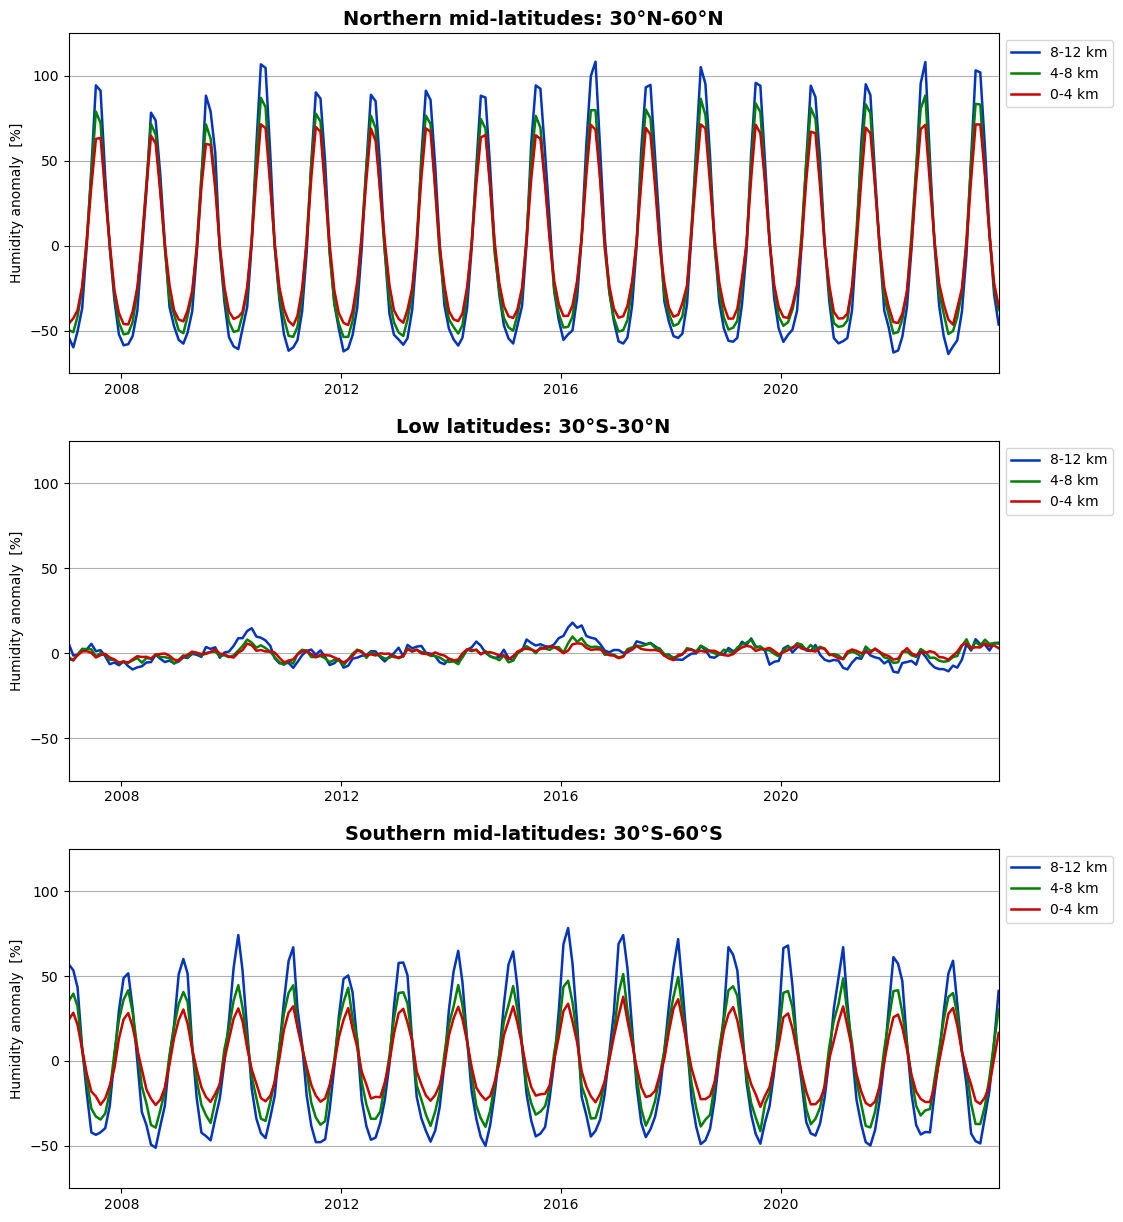

In [58]:
# Start/end times as instances of cftime
date_from = da_mean['time'][0].values
date_to   = da_mean['time'][-1].values

# Vertically averaged global-mean humidity anomalies, flip to get the 8-12 km layer first
izon = 3   # 30°N-60°N
da_hum_nmid = da_famean_latzone_layer[:, :, izon].squeeze()
da_hum_nmid = np.flip(da_hum_nmid)
izon = 2   # 30°S-30°N
da_hum_low = da_famean_latzone_layer[:, :, izon].squeeze()
da_hum_low = np.flip(da_hum_low)
izon = 1   # 30°S-60°S
da_hum_smid = da_famean_latzone_layer[:, :, izon].squeeze()
da_hum_smid = np.flip(da_hum_smid)

# Define figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot humidity, 30°N-60°N
ax1.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
da_hum_nmid[:, 0:3].plot.line(ax=ax1, x='time', xlim=[date_from, date_to], ylim=[-75.0, 125.0],
                              yticks=[-50, 0, 50, 100], linewidth=1.8, add_legend=True)
ax1.legend(['8-12 km', '4-8 km', '0-4 km'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax1.set_title('Northern mid-latitudes: 30°N-60°N', fontsize=14, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Humidity anomaly  [%]')
ax1.grid(which='major', axis='y')

# Plot humidity, 30°S-30°N
ax2.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
da_hum_low[:, 0:3].plot.line(ax=ax2, x='time', xlim=[date_from, date_to], ylim=[-75.0, 125.0],
                             yticks=[-50, 0, 50, 100], linewidth=1.8, add_legend=True)
ax2.legend(['8-12 km', '4-8 km', '0-4 km'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax2.set_title('Low latitudes: 30°S-30°N', fontsize=14, fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Humidity anomaly  [%]')
ax2.grid(which='major', axis='y')

# Plot humidity, 30°S-60°S
ax3.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
da_hum_smid[:, 0:3].plot.line(ax=ax3, x='time', xlim=[date_from, date_to], ylim=[-75.0, 125.0],
                              yticks=[-50, 0, 50, 100], linewidth=1.8, add_legend=True)
ax3.legend(['8-12 km', '4-8 km', '0-4 km'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title('Southern mid-latitudes: 30°S-60°S', fontsize=14, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Humidity anomaly  [%]')
ax3.grid(which='major', axis='y')

The same picture emerges: the seasonal variation of humidity is stronger in the northern hemisphere than in the southern hemisphere, while they are almost absent at low latitudes.

Let us now look at the global variation with season:

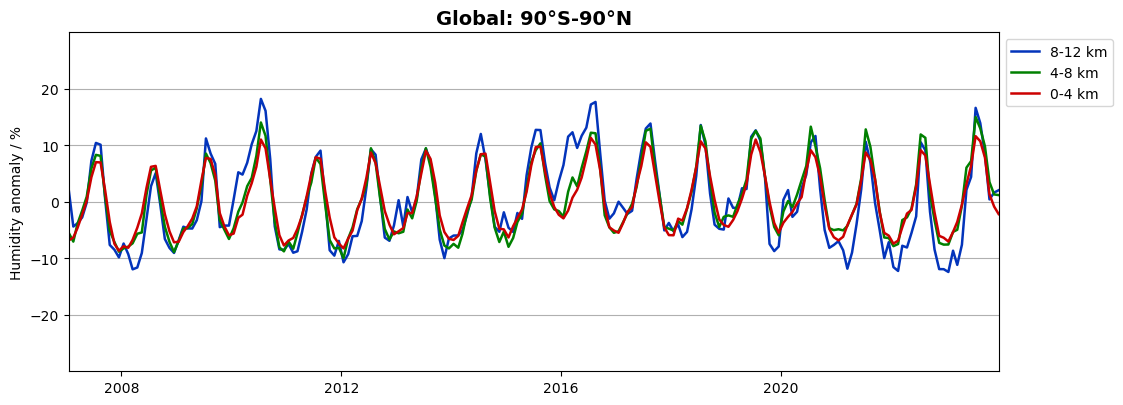

In [63]:
# Select global means (90°S-90°N)
izon = 5

# Vertically averaged global-mean humidity anomalies, flip to get the 8-12 km layer first
da_hum = da_famean_latzone_layer[:, :, izon].squeeze()
da_hum = np.flip(da_hum, 1)

# Define figure
fig, ax = plt.subplots(1, 1, figsize=(12, 4.4))

# Plot humidity
ax.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
da_hum[:, 0:3].plot.line(ax=ax, x='time', xlim=[date_from, date_to], ylim=[-30.0, 30.0],
                         yticks=[-20, -10, 0, 10, 20], linewidth=1.8, add_legend=True)
plt.legend(['8-12 km', '4-8 km', '0-4 km'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Global: 90°S-90°N', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Humidity anomaly / %')
plt.grid(which='major', axis='y')


We find a seasonal variation also in global data, dominated by the northern hemisphere seasons. Let us now see which humidity variations that remain if we plot the de-seasonalized anomalies:

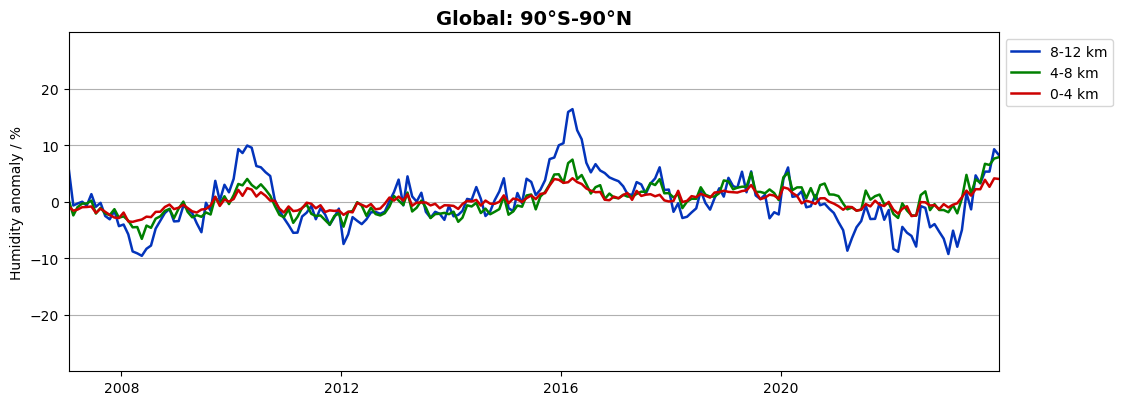

In [64]:
# Select global means (90°S-90°N)
izon = 5

# Vertically averaged global-mean humidity anomalies, flip to get the 8-12 km layer first
da_hum = da_desfamean_latzone_layer[:, :, izon].squeeze()
da_hum = np.flip(da_hum, 1)

# Define figure
fig, ax = plt.subplots(1, 1, figsize=(12, 4.4))

# Plot humidity
ax.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
da_hum[:, 0:3].plot.line(ax=ax, x='time', xlim=[date_from, date_to], ylim=[-30.0, 30.0],
                         yticks=[-20, -10, 0, 10, 20], linewidth=1.8, add_legend=True)
plt.legend(['8-12 km', '4-8 km', '0-4 km'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Global: 90°S-90°N', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Humidity anomaly / %')
plt.grid(which='major', axis='y')

We find a semi-annual variation in global humidity on the order of 5-10% on top of the mean seasonal variation. Several minima and maxima can be identified which coincide with different phases of the El Niño Southern Oscillation (ENSO) cycles. This is further explored in Use case 4 below.

## Use case 4:  global humidity and the El Niño Southern Oscillation

To proceed with this Use case you first need to go through Use case 3, as those time series are used here.

The El Niño-Southern Oscillation (ENSO) is a recurring phenomenon in the central and eastern tropical Pacific Ocean. On periods ranging from about three to seven years, the surface waters across a large swath of the tropical Pacific Ocean warm or cool by anywhere from 1°C to 3°C, compared to normal. The phase of the ENSO cycle is commonly quantified by indices describing the sea-surface temperatures (SSTs) in central parts of the Pacific, e.g., the NINO 3.4 index which can be thought of as the equatorial SSTs averaged from the dateline to the South American coast (5°S-5°N, 120°W-170°W).

The NINO 3.4 index is generated and distributed by NOAA's Climate Prediction Center (https://www.cpc.ncep.noaa.gov).
Let us download the file https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt, extract monthly data for the duration of the humidity time series, and store that data as a Numpy array. 

In [70]:
# Download the ENSO data file from NOAA's Climate Prediction Center
url = 'https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt'
ensofile = DATADIR + 'enso.dat'
urlretrieve(url, ensofile)

# List the seasons used in the ENSO data file
seastrng = ['DJF', 'JFM', 'FMA', 'MAJ', 'AMJ', 'MJJ',
            'JJA', 'JAS', 'ASO', 'SON', 'OND', 'NDJ']

# Read data from the file
f = open(ensofile, 'r')
seas_enso = np.genfromtxt(f, dtype=str,   skip_header=1, usecols=(0))
f.seek(0)
year_enso = np.genfromtxt(f, dtype=int,   skip_header=1, usecols=(1))
f.seek(0)
data_enso = np.genfromtxt(f, dtype=float, skip_header=1, usecols=(2, 3))
f.close()

# Locate the month in the ENSO record that coincide with the start the humidity data record
i0 = -1
for i in range(len(year_enso)):
    if year_enso[i] == da_year[0] and seas_enso[i] == seastrng[da_month[0].values-1]:
        i0 = i

# The ENSO 3.4 index during the humidity data record
mean_enso = data_enso[i0:i0+Ntime, 0].squeeze()
anom_enso = data_enso[i0:i0+Ntime, 1].squeeze()

Select global mean humidity anomalies from Use case 3. Use the de-seasonalized anomalies of data vertically averaged in latitude zones:

In [71]:
# Select global means (90°S-90°N)
izon = 5

# Vertically averaged global-mean humidity anomalies, flip to get the 8-12 km layer first
da_hum = da_desfamean_latzone_layer[:, :, izon].squeeze()
da_hum = np.flip(da_hum, 1)

Let us now plot the ENSO data along with the global humidity anomalies.

Text(0.5, 1.0, 'ENSO index')

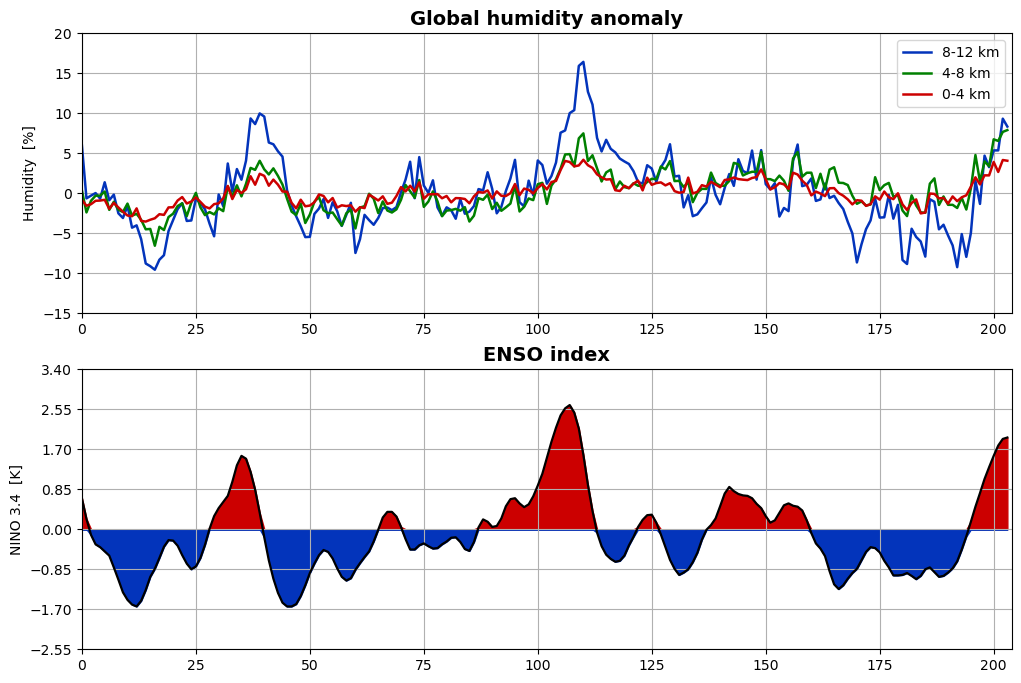

In [72]:
# Generate positive-only and negative-only ENSO time series
x = np.arange(Ntime)
yzero = np.zeros(Ntime)
ypos = np.where(anom_enso >= 0.0, anom_enso, yzero)
yneg = np.where(anom_enso < 0.0,  anom_enso, yzero)

# Define figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot global humidity
ax1.set_prop_cycle(color=['#0334BB', 'green', '#CC0000'])
ax1.plot(x, da_hum[:, 0:3], linewidth=1.8)
ax1.set_xlim(xmin=0, xmax=Ntime)
ax1.set_ylim(ymin=-15.0, ymax=20.0)
ax1.set_yticks([-15, -10, -5, 0, 5, 10, 15, 20])
ax1.grid(which='major')
ax1.legend(['8-12 km', '4-8 km', '0-4 km'])
ax1.set_ylabel('Humidity  [%]')
ax1.set_title('Global humidity anomaly', fontsize=14, fontweight='bold')

# Plot ENSO
ax2.plot(x, anom_enso, 'black', linewidth=1.6)
ax2.set_xlim(xmin=0, xmax=Ntime)
ax2.set_ylim(ymin=-2.55, ymax=3.4)
ax2.set_yticks([-2.55, -1.70, -0.85, 0.0, 0.85, 1.70, 2.55, 3.40])
ax2.grid(which='major')
ax2.fill_between(x, ypos, color='#CC0000')
ax2.fill_between(x, yneg, color='#0334BB')
ax2.set_ylabel('NINO 3.4  [K]')
ax2.set_title('ENSO index', fontsize=14, fontweight='bold')

# Save the figure
# fig.savefig(f'{DATADIR}ERA5_global_2016_anomaly_eur.png')

There is a close correspondence between the phase of ENSO and global humidity anomalies, where the humidity seems to lag ENSO by about 2-4 months. It appears that the ENSO is a major governing factor for global humidity. The details of the causality, e.g., which parts of the globe that contribute to this relation and what the relevant correlations and time lags are, is something that could be further studied with this and other humidity datasets.

## References

Gleisner, H., K.B. Lauritsen, J.K. Nielsen, and S. Syndergaard, (2020): Evaluation of the 15-year ROM SAF monthly mean GPS radio occultation climate data record, Atmos. Meas. Tech., 13, 3081–3098, DOI: https://doi.org/10.5194/amt-13-3081-2020
